<a href="https://colab.research.google.com/github/AlexSamarokov/StatPrak25/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

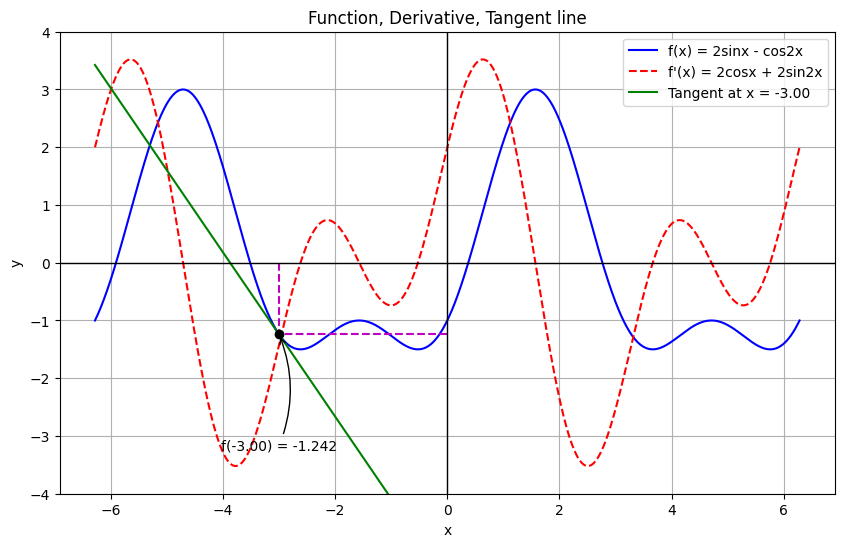

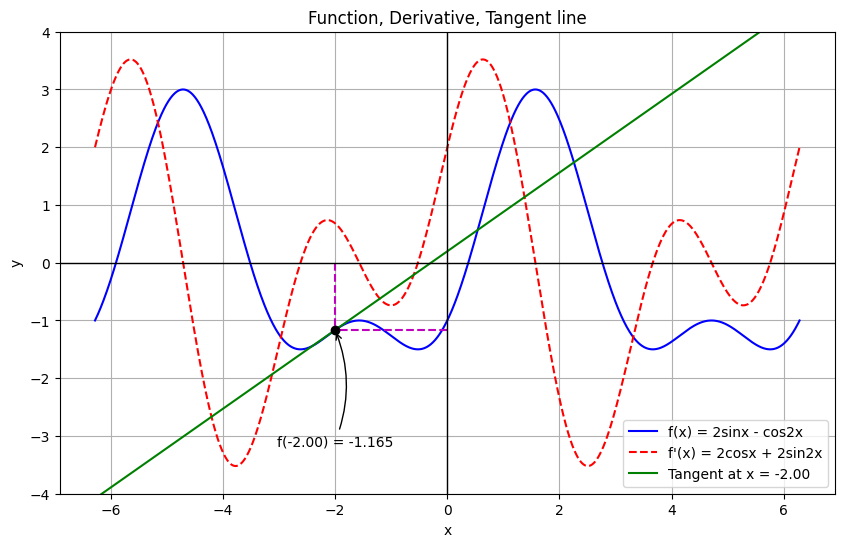

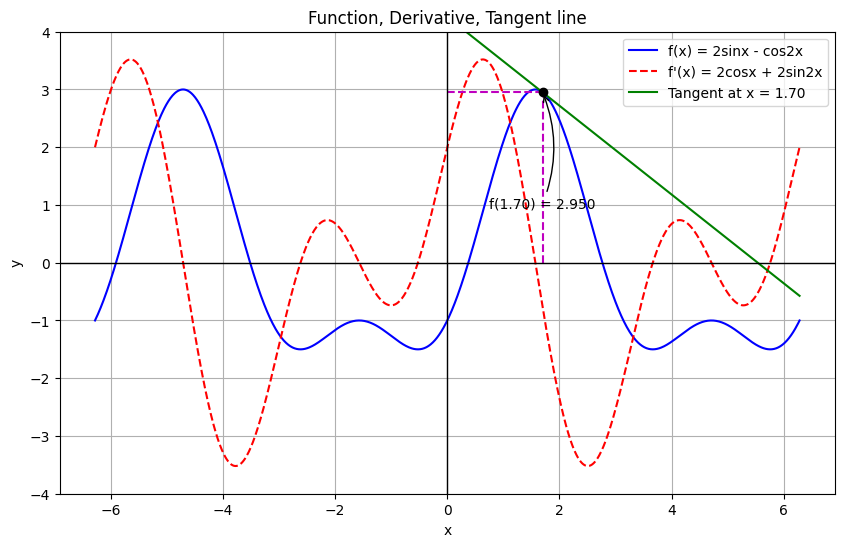

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(x0):
    # Определение функции и её производной
    def f(x):
        return 2 * np.sin(x) - np.cos(2 * x)

    def f_prime(x):
        return 2 * np.cos(x) + 2 * np.sin(2 * x)

    # Определение диапазона для оси X
    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

    # Вычисление значений функции и её производной
    y_vals = f(x_vals)
    y_prime_vals = f_prime(x_vals)

    # Уравнение касательной в точке x0
    tangent_line = f(x0) + f_prime(x0) * (x_vals - x0)

    # Создание графика
    fig, graph = plt.subplots(figsize=(10, 6))

    # Построение графиков функции, производной и касательной
    line1, = graph.plot(x_vals, y_vals, label=r'$f(x) = 2\sin x - \cos 2x$', color='blue')
    line2, = graph.plot(x_vals, y_prime_vals, 'r--', label=r"$f'(x) = 2\cos x + 2\sin 2x$")
    line3, = graph.plot(x_vals, tangent_line, 'green', label=f'Tangent at $x = {x0:.2f}$')

    # Линии, показывающие точку касания по осям X и Y
    tang = np.linspace(0, x0, 500)
    line5, = graph.plot(tang, np.full((500), f(x0)), 'm--')
    line6, = graph.plot(np.full((500), x0), np.linspace(0, f(x0), 500), 'm--')

    # Точка касания
    line4, = graph.plot(x0, f(x0), 'ko')

    # Оси координат
    graph.axhline(y=0, color='black', linewidth=1)
    graph.axvline(x=0, color='black', linewidth=1)

    # Аннотация с подписью значения функции в точке касания
    graph.annotate(
        f"f({x0:.2f}) = {f(x0):.3f}",
        xy=(x0, f(x0)),
        ha='center',
        xytext=(x0, f(x0) - 2),
        arrowprops=dict(arrowstyle="->", color='black', connectionstyle="arc3,rad=.2")
    )

    # Легенда, подписи осей и заголовок
    graph.legend((line1, line2, line3), ['f(x) = 2sinx - cos2x', "f'(x) = 2cosx + 2sin2x", f"Tangent at x = {x0:.2f}"])
    graph.set_xlabel('x')
    graph.set_ylabel('y')
    graph.set_title("Function, Derivative, Tangent line")

    # Ограничение по оси Y и добавление сетки
    graph.set_ylim(-4, 4)
    graph.grid(True)

    # Отображение графика
    plt.show()

# Пример использования
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

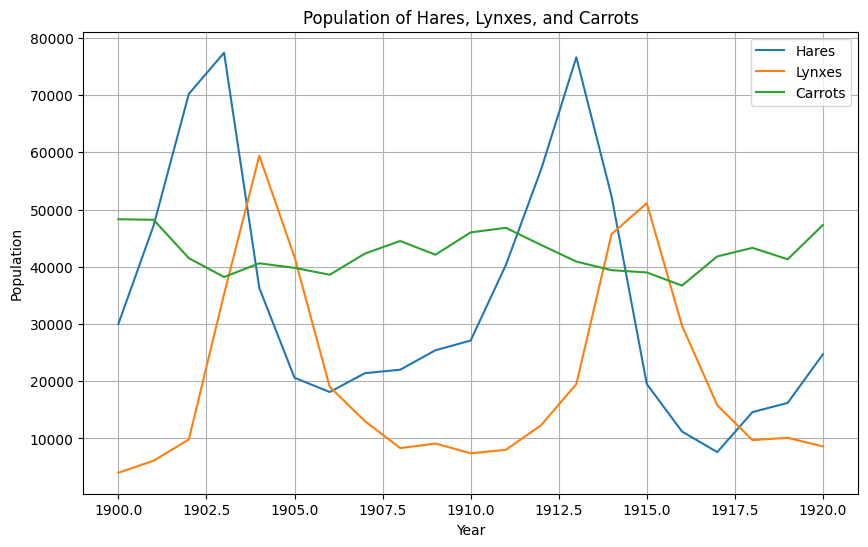

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = np.loadtxt("populations.txt")
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of Hares, Lynxes, and Carrots')
plt.legend()
plt.grid(True)
plt.show()


- Find which year each species had the largest population. Mark these years in the plot of populations.

Years with maximum population:
Hares: 1903
Lynxes: 1904
Carrots: 1900


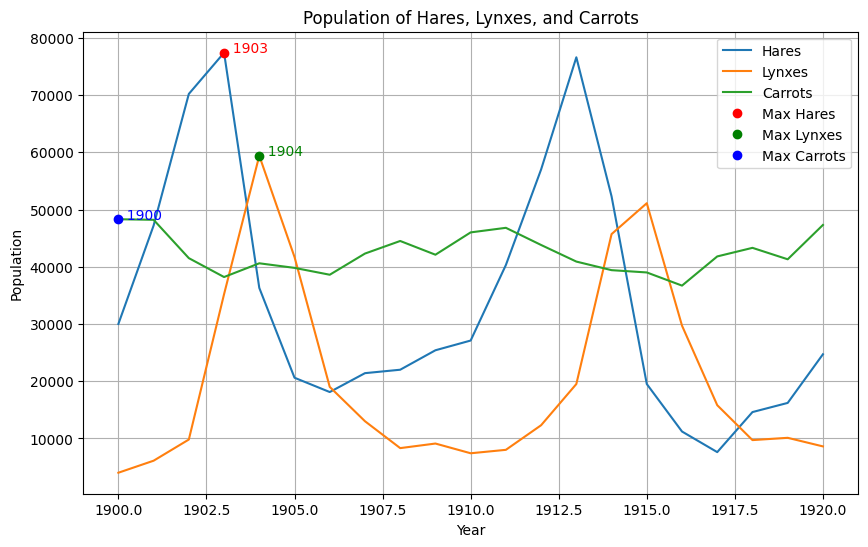

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = np.loadtxt('populations.txt', skiprows=1)
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# Поиск годов с наибольшей популяцией
max_years = {
    'Hares': years[np.argmax(hares)],
    'Lynxes': years[np.argmax(lynxes)],
    'Carrots': years[np.argmax(carrots)]
}

print("Years with maximum population:")
print(f"Hares: {max_years['Hares']}")
print(f"Lynxes: {max_years['Lynxes']}")
print(f"Carrots: {max_years['Carrots']}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')

# Отметка годов с наибольшей популяцией
plt.plot(max_years['Hares'], max(hares), 'ro', label='Max Hares')
plt.plot(max_years['Lynxes'], max(lynxes), 'go', label='Max Lynxes')
plt.plot(max_years['Carrots'], max(carrots), 'bo', label='Max Carrots')

# Подписи для отметок
plt.text(max_years['Hares'], max(hares), f"  {max_years['Hares']}", color='red')
plt.text(max_years['Lynxes'], max(lynxes), f"  {max_years['Lynxes']}", color='green')
plt.text(max_years['Carrots'], max(carrots), f"  {max_years['Carrots']}", color='blue')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of Hares, Lynxes, and Carrots')
plt.legend()
plt.grid(True)
plt.show()


- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

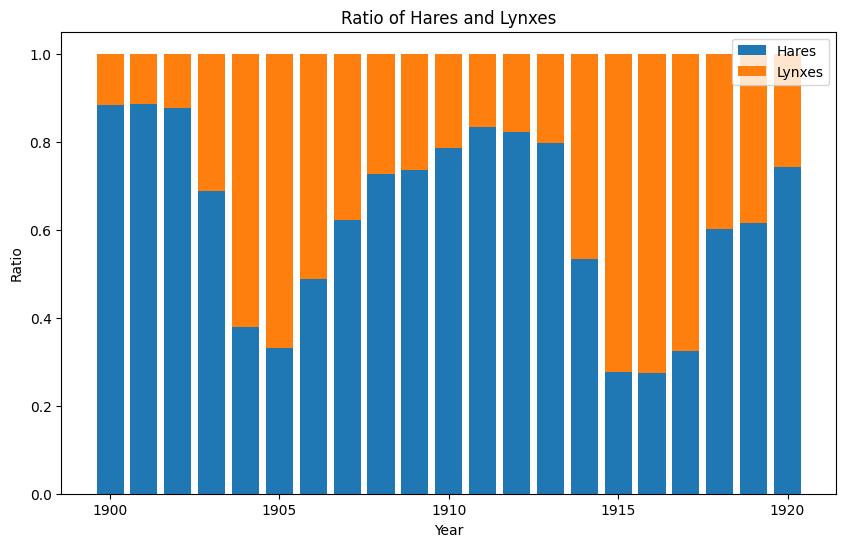

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = np.loadtxt('populations.txt', skiprows=1)
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

# Соотношение популяций
total = hares + lynxes
hares_ratio = hares / total
lynxes_ratio = lynxes / total

# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.bar(years, hares_ratio, label='Hares')
plt.bar(years, lynxes_ratio, bottom=hares_ratio, label='Lynxes')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Ratio of Hares and Lynxes')
plt.legend()
plt.show()


- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

Hares - Mean: 34080.95238095238, Std: 20897.906458089667
Lynxes - Mean: 20166.666666666668, Std: 16254.591536908763
Carrots - Mean: 42400.0, Std: 3322.5062255844787


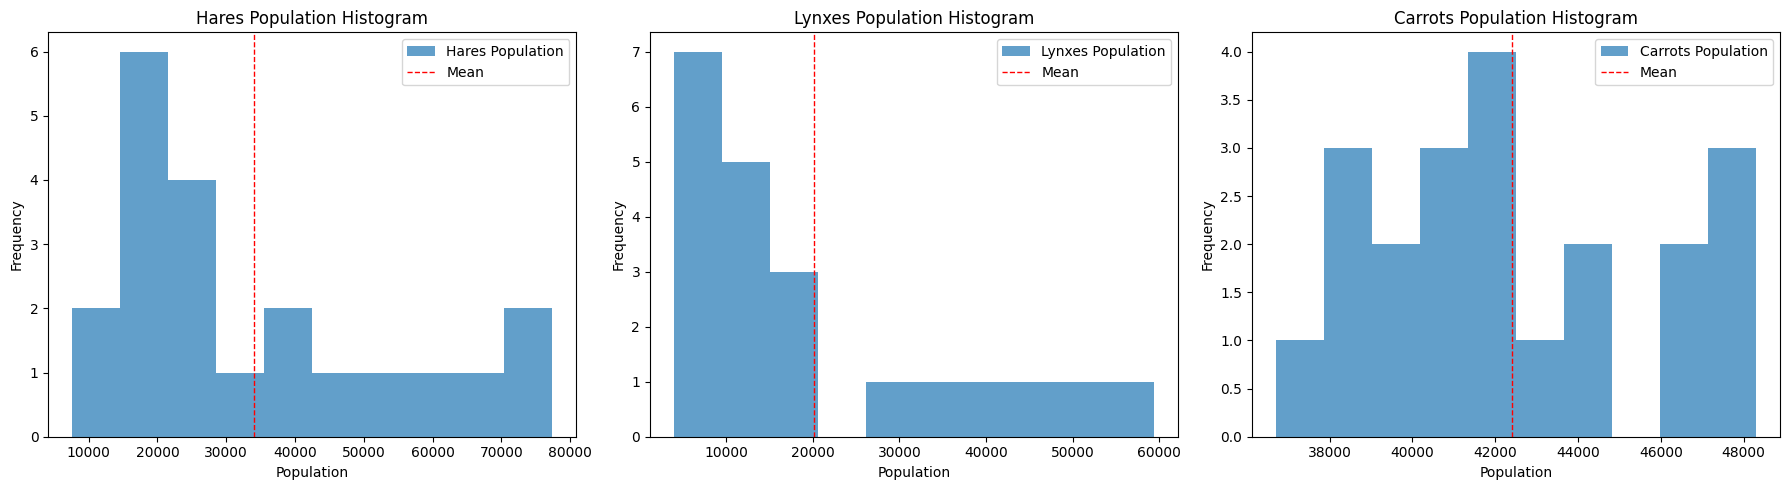

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = np.loadtxt('populations.txt', skiprows=1)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

species = {'Hares': hares, 'Lynxes': lynxes, 'Carrots': carrots}
plt.figure(figsize=(18, 5))

# Построение гистограмм
for i, (name, population) in enumerate(species.items()):
    mean = np.mean(population)
    std = np.std(population)
    print(f"{name} - Mean: {mean}, Std: {std}")

    plt.subplot(1, 3, i+1)
    plt.hist(population, bins=10, alpha=0.7, label=f'{name} Population')
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.title(f'{name} Population Histogram')
    plt.xlabel('Population')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

Largest species each year: ['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


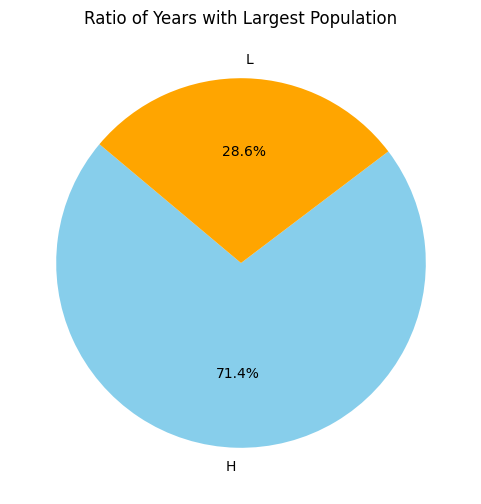

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = np.loadtxt('populations.txt', skiprows=1)
hares = data[:, 1]
lynxes = data[:, 2]

# Определение преобладающего вида
largest_species = np.where(hares > lynxes, 'H', 'L')
print('Largest species each year:', list(largest_species))

# Круговая диаграмма
unique, counts = np.unique(largest_species, return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Ratio of Years with Largest Population')
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

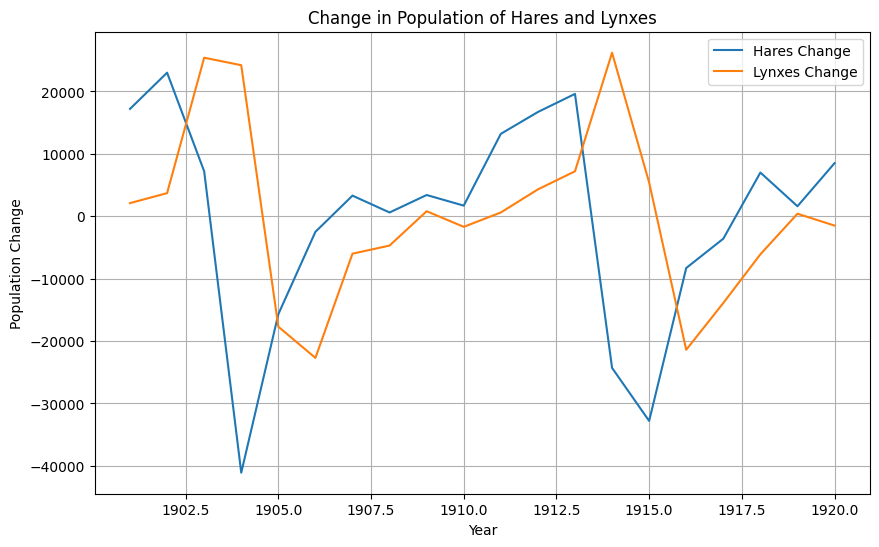

Correlation coefficient between changes: -0.1780136594118296


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = np.loadtxt('populations.txt', skiprows=1)
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

# Изменение популяций
hares_change = np.diff(hares)
lynxes_change = np.diff(lynxes)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years[1:], hares_change, label='Hares Change')
plt.plot(years[1:], lynxes_change, label='Lynxes Change')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Change in Population of Hares and Lynxes')
plt.legend()
plt.grid(True)
plt.show()

# Коэффициент корреляции
correlation = np.corrcoef(hares_change, lynxes_change)[0, 1]
print('Correlation coefficient between changes:', correlation)


- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

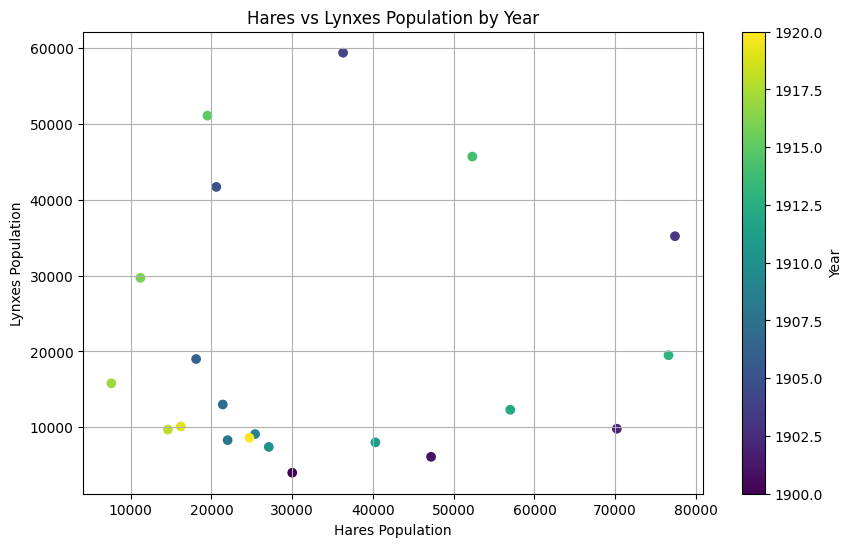

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = np.loadtxt('populations.txt', skiprows=1)
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

# Диаграмма рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(hares, lynxes, c=years, cmap='viridis', label='Year')
plt.xlabel('Hares Population')
plt.ylabel('Lynxes Population')
plt.title('Hares vs Lynxes Population by Year')
plt.colorbar(label='Year')
plt.grid(True)
plt.show()


- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [ ]:
import numpy as np

# Загрузка данных
data = np.loadtxt('populations.txt', skiprows=1)
hares = data[:, 1]

# Оценка с использованием линейной интерполяции
hare_1920_est = (hares[-2] + hares[-3]) / 2
true_value = hares[-1]
error_ratio = abs(hare_1920_est - true_value) / true_value

print(f"Estimated hare population in 1920: {hare_1920_est}")
print(f"True hare population in 1920: {true_value}")
print(f"Error ratio: {error_ratio}")


Estimated hare population in 1920: 15400.0
True hare population in 1920: 24700.0
Error ratio: 0.3765182186234818
